## **Data Preprocessing & Exploratory Data Analysis (EDA)**

This notebook includes all the code to preprocess and explore all available data

### **Data Preprocessing**

Import libraries

In [ ]:
# Importing libraries
import pandas as pd
import html
import re
from google.colab import drive, files

# Getting access to google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Load and transform the product prices

In [ ]:
# Setting the path of the drive
drive_path = "/content/drive/MyDrive/Data Science Challenge/deliverable/data/"

# Opening the file
product_prices_file = open(drive_path + "price.txt", "r")

# Reading the lines of the file
product_prices = product_prices_file.readlines()

# Closing the file
product_prices_file.close()

# Separating the product id from the price
product_prices = [
    product_price.split("\n")[0].split(",") for product_price in product_prices
]

# Converting to a dataframe
product_prices_df = pd.DataFrame(product_prices, columns=["product_id", "price"])

# Converting the product id to integer
product_prices_df = product_prices_df.astype({"product_id": "int"})

# Storing
product_prices_df.to_excel(drive_path + "product_prices.xlsx", index=False)

print(f"Print some rows:\n {product_prices_df.head(5)}")

Print some rows:
    product_id   price
0           0    50.5
1           2   17.97
2           3    4.99
3           4    36.6
4           5  199.95


Load and transform the product descriptions

In [ ]:
# Opening the file
product_descriptions_file = open(drive_path + "description.txt", "r")

# Reading the lines of the file
product_descriptions = product_descriptions_file.readlines()

# Closing the file
product_descriptions_file.close()

# Separating the product id from the description
product_descriptions = [
    product_description.split("|=|") for product_description in product_descriptions
]

# Converting to a dataframe
product_descriptions_df = pd.DataFrame(
    product_descriptions, columns=["product_id", "description"]
)

# Converting the product id to integer
product_descriptions_df = product_descriptions_df.astype({"product_id": "int"})

Define a function to clean and process the product descriptions

In [ ]:
def clean_product_description(product_description):
    """
    This function is used to clean and process a product description

    :param product_description: A product description
    :return: The cleaned product description
    """

    # Removing HTML entities
    product_description = html.unescape(product_description)

    # Removing HTML tags
    product_description = re.sub(r"<[^>]+>", " ", product_description)

    # Removing non-printable characters
    product_description = re.sub(r"[\x00-\x1F\x7F-\x9F]", "", product_description)

    # Removing tabs and newlines characters
    product_description = re.sub(r"[\r\n\t]+", " ", product_description)

    # Removing multiple spaces
    product_description = re.sub(r"\s+", " ", product_description)

    return product_description.strip()

Clean the product descriptions

In [ ]:
# Cleaning
product_descriptions_df["description"] = product_descriptions_df["description"].apply(
    clean_product_description
)

# Storing
product_descriptions_df.to_excel(drive_path + "product_descriptions.xlsx", index=False)

print(f"Print some rows:\n {product_descriptions_df.head(5)}")

Print some rows:
    product_id                                        description
0           0  FSA Orbit 1.5ZS Zero Stack Internal Bicycle He...
1           1  Columbia Bugaboo II 12-Foot-by-9-Foot 4-Pole 5...
2           2     Men's New Gym Workout Short Gary Majdell Sport
3           3  Vktech Cute Creative Girls Tibet Silver Petal ...
4           4  Real Avid ZipWire Pistol Cleaning Kit Real Avi...


Load and transform the labels of the training data (products)

In [ ]:
# Opening the file
training_labels_file = open(drive_path + "y_train.txt", "r")

# Reading the lines of the file
training_labels = training_labels_file.readlines()

# Closing the file
training_labels_file.close()

# Separating the product id from the label
training_labels = [
    training_label.split("\n")[0].split(",") for training_label in training_labels
]

# Converting to a dataframe
training_labels_df = pd.DataFrame(training_labels, columns=["product_id", "label"])

# Converting the columns to integers
training_labels_df = training_labels_df.astype({"product_id": "int", "label": "int"})

print(f"Print some rows:\n {training_labels_df.head(5)}")

Print some rows:
    product_id  label
0       66795      9
1      242781      3
2       91280      2
3       56356      5
4      218494      0


Load and transform the test data (products)

In [ ]:
# Opening the file
test_products_file = open(drive_path + "test.txt", "r")

# Reading the lines of the file
test_products = test_products_file.readlines()

# Closing the file
test_products_file.close()

# Splitting
test_products = [test_product.split(",")[0] for test_product in test_products]

# Converting to a dataframe
test_products_df = pd.DataFrame(test_products, columns=["product_id"])

# Converting to integers
test_products_df["product_id"] = test_products_df["product_id"].astype(int)

print(f"Print some rows:\n {test_products_df.head(5)}")

Print some rows:
    product_id
0       49957
1      135386
2      226880
3      165114
4      256154


Combine the dataframes

In [ ]:
# Getting the training dataset
training_dataset = product_descriptions_df.merge(
    training_labels_df, on="product_id", how="inner"
)

# Getting the test dataset
test_dataset = product_descriptions_df.merge(
    test_products_df, on="product_id", how="inner"
)

# Storing the datasets
training_dataset.to_excel(drive_path + "training_dataset.xlsx", index=False)
test_dataset.to_excel(drive_path + "test_dataset.xlsx", index=False)

print(
    f"Print some rows:\n\nTraining Dataset:\n{training_dataset.head(5)}\n\nTest Dataset:\n{test_dataset.head(5)}"
)

Print some rows:

Training Dataset:
   product_id                                        description  label
0           0  FSA Orbit 1.5ZS Zero Stack Internal Bicycle He...      5
1           1  Columbia Bugaboo II 12-Foot-by-9-Foot 4-Pole 5...     10
2           2     Men's New Gym Workout Short Gary Majdell Sport      0
3           3  Vktech Cute Creative Girls Tibet Silver Petal ...      7
4           4  Real Avid ZipWire Pistol Cleaning Kit Real Avi...      2

Test Dataset:
   product_id                                        description
0           7  Ontario Knives 8849OD Ontario Knives - Part Se...
1           8  Franklin Sports Recreational Volleyball Set Th...
2          15  2012 Flite Kite Dedicated light wind design! F...
3          17  Under Armour Elevate 22 Ounce Tritan Bottle wi...
4          18  Spalding 88354PR NBA 48" Polycarbonate Backboa...


Load and transform the products graph

In [ ]:
# Opening the file
products_graph_file = open(drive_path + "edgelist.txt", "r")

# Reading the lines of the file
edges = products_graph_file.readlines()

# Closing the file
products_graph_file.close()

# Separating the nodes in the edges
edges = [[int(node) for node in edge.replace("\n", "").split(",")] for edge in edges]

print(f"Print some edges:\n {edges[:5]}")

Print some edges:
 [[251528, 237411], [100805, 74791], [38634, 97747], [247470, 77089], [267060, 250490]]


Make the graph undirected and save it

In [ ]:
# Initializing a list for the final edges
final_edges = []

# Iterating over the edges
for edge in edges:

    # Adding the current edge
    final_edges.append(edge)

    # Adding the inverse edge
    final_edges.append([edge[1], edge[0]])

# Opening a file to save the final undirected graph
undirected_graph_file = open(drive_path + "undirected_products_graph.txt", "w")

# Iterating over the edges
for edge in final_edges:

    # Writting
    undirected_graph_file.write(f"{edge}\n")

# Closing the file
undirected_graph_file.close()

### **Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Ensure pandas is imported as well

# Set aesthetic for plots
sns.set_style("whitegrid")

print("--- Starting Exploratory Data Analysis (EDA) ---")

--- Starting Exploratory Data Analysis (EDA) ---


In [ ]:
# --- 1. Product Prices Analysis ---
print("\n--- Product Prices Analysis ---")

# Load the processed product prices dataframe
# Assuming 'product_prices.xlsx' was saved in the preprocessing step

try:
    product_prices_df = pd.read_excel(drive_path + "product_prices.xlsx")
except FileNotFoundError:
    print("Error: 'product_prices.xlsx' not found. Please ensure preprocessing is run.")



# Convert 'price' to numeric (if not already done during preprocessing or if loading from file)
product_prices_df['price'] = pd.to_numeric(product_prices_df['price'], errors='coerce')

print("\nProduct Prices Descriptive Statistics:")
product_prices_df['price'].describe()


--- Product Prices Analysis ---

Product Prices Descriptive Statistics:


,price
count,198817.000000
mean,55.296755
std,92.825041
min,0.010000
25%,12.990000
50%,24.990000
75%,55.800000
max,999.990000


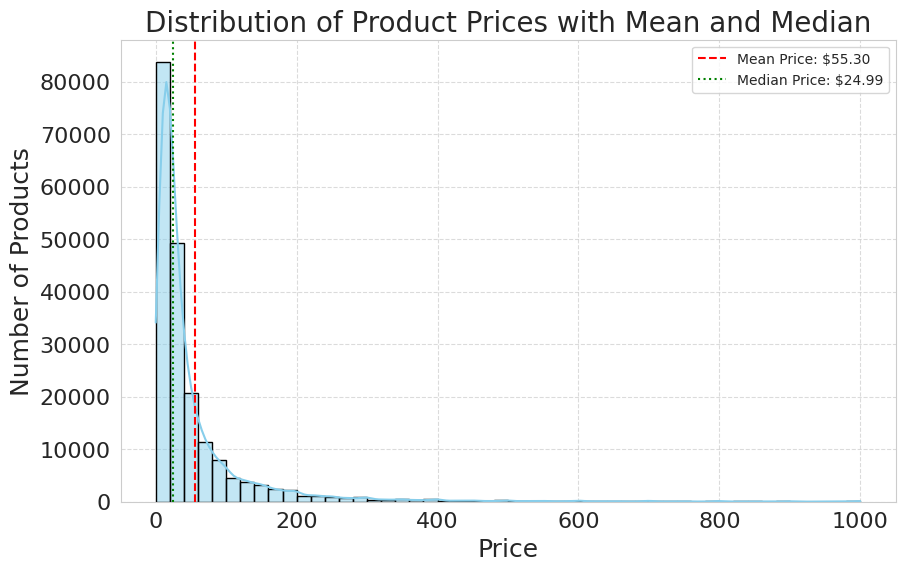

In [ ]:
# --- Enhanced Product Price Distribution Plot ---
plt.figure(figsize=(10, 6)) # Increased figure size for better readability

# Create the histogram with KDE
sns.histplot(product_prices_df['price'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Calculate mean and median prices
mean_price = product_prices_df['price'].mean()
median_price = product_prices_df['price'].median()

# Add vertical lines for mean and median
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean Price: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle=':', label=f'Median Price: ${median_price:.2f}')

# Customize plot title and labels
plt.title('Distribution of Product Prices with Mean and Median', fontsize=20)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Number of Products', fontsize=18)
plt.tick_params(axis='x', labelsize=16) # Adjust labelsize as needed for X-axis ticks
plt.tick_params(axis='y', labelsize=16) # Adjust labelsize as needed for Y-axis ticks
# Add a grid for easier reading
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend for the mean and median lines
plt.legend()

# Display the plot
plt.show()

This plot, titled "Distribution of Product Prices with Mean and Median," is a histogram visualizing the frequency of different product prices.

Here's a breakdown and commentary on the key aspects of the plot:

**1. Overall Shape and Skewness:**
* The distribution is **highly right-skewed (positively skewed)**. This is evident from the long tail extending towards higher prices on the right side of the graph.
* The vast majority of products are concentrated at lower price points, as indicated by the very tall bars on the left side of the histogram (roughly between $0 and $100).
* As the price increases, the number of products dramatically decreases, with very few products being priced above approximately $400-$500.

**2. Mean vs. Median:**

* **Mean Price: $55.30 (red dashed line)**: The mean is the arithmetic average of all product prices. In a right-skewed distribution, the mean is pulled towards the higher values by the influence of the relatively few expensive products.

* **Median Price: $24.99 (green dotted line)**: The median represents the middle value of the data when sorted. Because of the large concentration of inexpensive products, the median is significantly lower than the mean.

* **Interpretation of Mean vs. Median Difference:** The substantial difference between the mean ($55.30)
and the median
($24.99) strongly reinforces the conclusion that the data is skewed. If the distribution were symmetrical, the mean and median would be very close or identical.

**3. Price Range and Outliers:**
* The x-axis ranges from $0 to $1000, suggesting that while most products are cheap, there are some products with prices up to $1000, though they are very rare.
* The presence of a few very high-priced products acts as "outliers" that significantly influence the mean, pulling it away from the bulk of the data.

**4. Implications:**
* **Typical Price:** The median price of $24.99 is a better representation of the "typical" or "most common" price for a product in this dataset, as it is less affected by the extreme high values.
* **Market Dynamics/Product Strategy:** This distribution might suggest a business model where a large volume of inexpensive products are sold, complemented by a smaller number of premium or high-value items.
* **Further Analysis:** For a deeper understanding, it might be useful to investigate the characteristics of the products at the very high end of the price spectrum to understand why they command such prices.

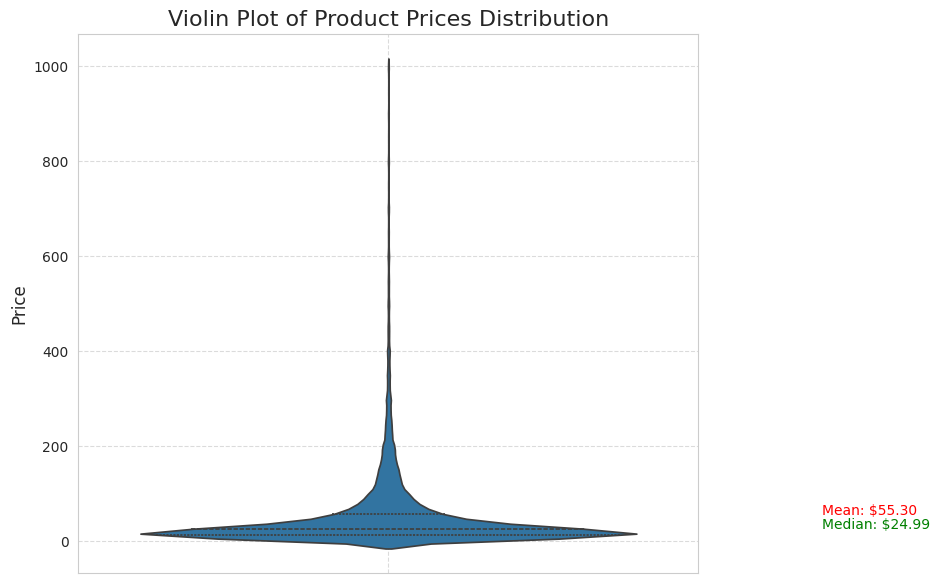

Number of unique product IDs in product_prices_df: 198817
Number of products with missing prices: 0


In [ ]:
# --- Enhanced Plot: Violin Plot for Product Prices ---
plt.figure(figsize=(8, 7))

# Create a violin plot, which combines aspects of a box plot and a KDE plot.
# It shows the distribution shape (density) in addition to quartiles.
sns.violinplot(y=product_prices_df['price'], inner='quartile')

plt.title('Violin Plot of Product Prices Distribution', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add descriptive statistics (mean, median) for clarity
mean_price = product_prices_df['price'].mean()
median_price = product_prices_df['price'].median()

# Annotate mean and median on the plot for better insight
# Position these annotations carefully to avoid overlap with the violin itself
plt.text(0.7, mean_price, f'Mean: ${mean_price:.2f}', color='red', fontsize=10, ha='left')
plt.text(0.7, median_price, f'Median: ${median_price:.2f}', color='green', fontsize=10, ha='left')

plt.show()

print(f"Number of unique product IDs in product_prices_df: {product_prices_df['product_id'].nunique()}")
print(f"Number of products with missing prices: {product_prices_df['price'].isnull().sum()}")

This plot is a "Violin Plot of Product Prices Distribution," which provides a more detailed view of the distribution's shape compared to a simple box plot or histogram, especially useful for understanding density.

Here's a commentary on the violin plot:

**1. Overall Shape and Density:**
* The violin plot shows a very **narrow, elongated shape, strongly concentrated at the lower end of the price spectrum.** This visually confirms the severe right-skewness observed in the previous histogram.
* The "body" of the violin is widest near the bottom (around $0-$50), indicating a very high density of products in this price range.
* As the price increases, the violin quickly narrows, signifying a rapid decrease in the number of products.
* There's a very long, thin "tail" extending upwards to $1000, which represents the few, high-priced products that contribute to the skewness.

**2. Internal Elements (Implied from typical violin plot structure):**
* While not explicitly labeled with lines like in a standard box plot, a violin plot typically encloses:
    * **Median (often a dotted line within the violin):** This would correspond to the $24.99 median price. The plot likely shows a dotted line near this value, indicating the center of the data.
    * **Interquartile Range (IQR - often a box within the violin):** This would represent the middle 50% of the data. Given the skewness, this range would be very narrow and close to the lower prices.
    * **Whiskers:** These would extend to a certain range of the data (e.g., 1.5 times the IQR from the quartiles), beyond which individual points would be considered outliers.

**3. Mean vs. Median (Explicitly Labeled):**
* **Mean: $55.30 (red text)**: This value is significantly higher than the median, pulled upwards by the sparse but high-value products in the upper tail.
* **Median: $24.99 (green text)**: This value is much closer to the dense part of the distribution, confirming that half of the products are priced below $24.99.

**4. Consistency with Histogram:**
* This violin plot beautifully corroborates the observations from the histogram:
    * Both plots clearly show the extreme right-skewness.
    * Both highlight the high concentration of products at low prices.
    * Both indicate the presence of a few very expensive products that stretch the range of prices.

**5. Advantages of a Violin Plot in this context:**
* Unlike a box plot, the violin plot reveals the *density* of the data at different price points, allowing us to see exactly where the mass of the data lies. The "fatter" parts of the violin indicate higher concentrations of data.
* It visually emphasizes the high volume of low-priced items and the rapidly diminishing number of higher-priced items.

**In summary, this violin plot provides a clear and intuitive representation of a heavily right-skewed product price distribution, where a large number of products are inexpensive, and a small number are very expensive, significantly influencing the mean price.**

In [ ]:
# --- 2. Product Descriptions Analysis ---
print("\n--- Product Descriptions Analysis ---")

# Load the processed product descriptions dataframe
# Assuming 'product_descriptions.xlsx' was saved in the preprocessing step

try:
    product_descriptions_df = pd.read_excel(drive_path + "product_descriptions.xlsx")
except FileNotFoundError:
    print("Error: 'product_descriptions.xlsx' not found. Please ensure preprocessing is run.")

print("\nProduct Descriptions Descriptive Statistics:")
product_descriptions_df['description'].describe()


--- Product Descriptions Analysis ---

Product Descriptions Descriptive Statistics:


,description
count,276453
unique,241333
top,"Paracord Planet 10', 25', 50', 100' Hanks & 25..."
freq,58


Number of descriptions with length 0: 0
Average description length: 434
Median description length: 285
Minimum description length: 1
Maximum description length: 11492


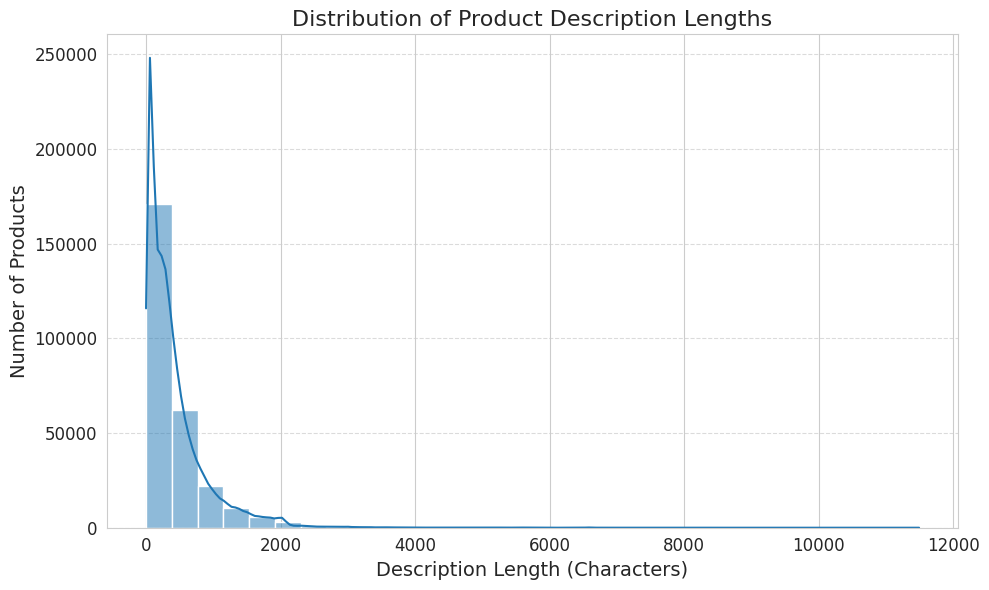

In [ ]:

product_descriptions_df['description_length'] = product_descriptions_df['description'].apply(len)


## Analyzing Description Lengths

print(f"Number of descriptions with length 0: {(product_descriptions_df['description_length'] == 0).sum()}")
print(f"Average description length: {product_descriptions_df['description_length'].mean():.0f}")
print(f"Median description length: {product_descriptions_df['description_length'].median():.0f}")
print(f"Minimum description length: {product_descriptions_df['description_length'].min():.0f}")
print(f"Maximum description length: {product_descriptions_df['description_length'].max():.0f}")


# ---
## Improved Plot for Description Length Distribution

plt.figure(figsize=(10, 6)) # Increased figure size for better readability
sns.histplot(product_descriptions_df['description_length'], bins=30, kde=True)
# bins: Reduced bins slightly for a smoother curve if data is sparse, or increase for more detail
# color: Changed to a more vibrant green for better aesthetics
# edgecolor: Added black edges to bins for better definition

plt.title('Distribution of Product Description Lengths', fontsize=16) # More concise title, increased font size
plt.xlabel('Description Length (Characters)', fontsize=14) # Clearer label, increased font size
plt.ylabel('Number of Products', fontsize=14) # Increased font size
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid lines only on y-axis, lighter and dashed
plt.xticks(fontsize=12) # Increased tick font size
plt.yticks(fontsize=12) # Increased tick font size
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

This plot, titled "Distribution of Product Description Lengths," is a histogram overlaid with a Kernel Density Estimate (KDE) curve, showing the frequency distribution of product description lengths in characters.

Here's a commentary on the key aspects of the plot:

**1. Overall Shape and Skewness:**
* The distribution is **extremely right-skewed (positively skewed)**. This is the most dominant feature, indicating that the vast majority of product descriptions are very short.
* The KDE curve, which smooths the histogram, clearly shows a sharp peak at a very low description length, and then a rapid decline.

**2. Concentration of Data:**
* A very large number of products have description lengths between approximately 0 and 500 characters. The tallest bars are concentrated in this region.
* The peak of the distribution is very close to 0, suggesting many products have extremely short descriptions, possibly even empty or very brief.
* As the description length increases, the number of products with those lengths drops off very quickly.

**3. Range of Description Lengths:**
* The x-axis (Description Length) extends up to 12,000 characters, indicating that while rare, some product descriptions can be very long.
* However, the histogram bars become almost imperceptible beyond approximately 2000-3000 characters, highlighting the sparsity of long descriptions.

**4. Implications and Observations:**
* **Conciseness is Common:** The plot strongly suggests that most product descriptions are concise. This could be due to platform constraints, user preferences for brevity, or the nature of the products themselves not requiring extensive detail.
* **Potential for "Outliers":** The long tail signifies that a small number of products have exceptionally detailed descriptions. These could be complex products, luxury items, or products requiring extensive specifications.

**In summary, the plot vividly illustrates that most product descriptions are short, with a strong concentration near zero characters, and only a tiny fraction are very lengthy, leading to a highly right-skewed distribution.**

Average word count in descriptions: 69
Median word count in descriptions: 46
Minimum word count in descriptions: 1
Maximum word count in descriptions: 1672


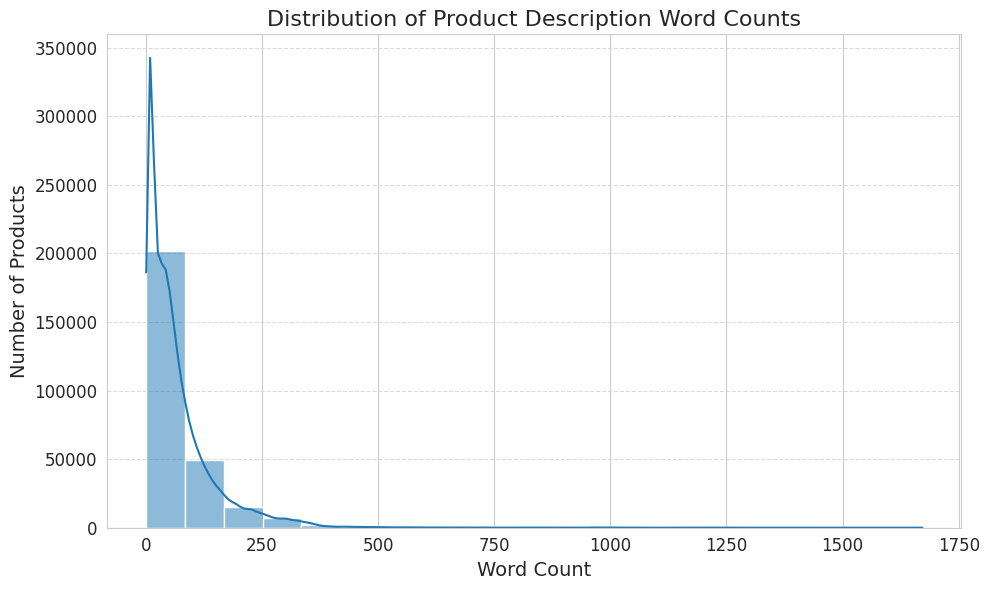

In [ ]:
# Calculate word count, ensuring robustness for non-string types
product_descriptions_df['word_count'] = product_descriptions_df['description'].apply(lambda x: len(str(x).split()))

print(f"Average word count in descriptions: {product_descriptions_df['word_count'].mean():.0f}")
print(f"Median word count in descriptions: {product_descriptions_df['word_count'].median():.0f}")
print(f"Minimum word count in descriptions: {product_descriptions_df['word_count'].min():.0f}")
print(f"Maximum word count in descriptions: {product_descriptions_df['word_count'].max():.0f}")




plt.figure(figsize=(10, 6)) # Increased figure size for better readability
sns.histplot(product_descriptions_df['word_count'], bins=20, kde=True)
# bins: Adjusted for potentially fewer distinct word counts than character counts


plt.title('Distribution of Product Description Word Counts', fontsize=16) # More concise title, increased font size
plt.xlabel('Word Count', fontsize=14) # Clearer label, increased font size
plt.ylabel('Number of Products', fontsize=14) # Increased font size
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid lines only on y-axis, lighter and dashed
plt.xticks(fontsize=12) # Increased tick font size
plt.yticks(fontsize=12) # Increased tick font size
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

This plot, titled "Distribution of Product Description Word Counts," is a histogram overlaid with a Kernel Density Estimate (KDE) curve, showing the frequency distribution of the number of words in product descriptions.

Here's a commentary on the key aspects of the plot:

**1. Overall Shape and Skewness:**
* Similar to the description length in characters, this distribution is also **extremely right-skewed (positively skewed)**. The bulk of the data is concentrated at very low word counts, and the tail extends significantly to the right.
* The KDE curve shows a very sharp peak close to zero, indicating that a very large number of product descriptions are extremely brief.

**2. Concentration of Data:**
* An overwhelming majority of product descriptions have a word count between 0 and approximately 100-150 words. The tallest histogram bars are clearly in this range.
* The frequency of descriptions rapidly declines as the word count increases.

**3. Range of Word Counts:**
* The x-axis (Word Count) extends up to approximately 1750 words, suggesting that while rare, some product descriptions can be quite lengthy.
* However, beyond roughly 250-300 words, the number of products with descriptions of that length becomes very small, making the histogram bars almost invisible.

**4. Consistency with Description Length (Characters) Plot:**
* This plot reinforces the findings from the "Distribution of Product Description Lengths" plot. Both metrics (characters and words) show that brevity is a dominant characteristic of the product descriptions. This makes sense, as more characters generally mean more words.

**5. Implications and Observations:**
* **Emphasis on Conciseness:** The plot strongly suggests that most product descriptions are designed to be concise and to-the-point. This could be driven by platform limitations, user attention spans, or the nature of the products.
* **Informational Needs:** The long tail, albeit sparse, indicates that some products require more extensive textual information. These might be complex items, products with detailed specifications, or those requiring more persuasive or informative copy.

**In summary, this plot vividly demonstrates that the vast majority of product descriptions are very short in terms of word count, leading to a highly right-skewed distribution, with only a small proportion being extensive.**

In [ ]:
# --- 3. Training Labels Analysis ---
print("\n--- Training Labels Analysis ---")


try:
    training_labels_df = pd.read_excel(drive_path + "training_dataset.xlsx")
    # We only need the product_id and label for this section
    training_labels_df = training_labels_df[['product_id', 'label']]
except FileNotFoundError:
    print("Error: 'training_dataset.xlsx' not found. Please ensure preprocessing is run.")

print("\nTraining Labels Value Counts:")
training_labels_df['label'].value_counts()


--- Training Labels Analysis ---

Training Labels Value Counts:


,count
label,
2,43260
7,18760
10,17942
5,17822
0,15165
4,15079
1,11861
6,7595
11,7124


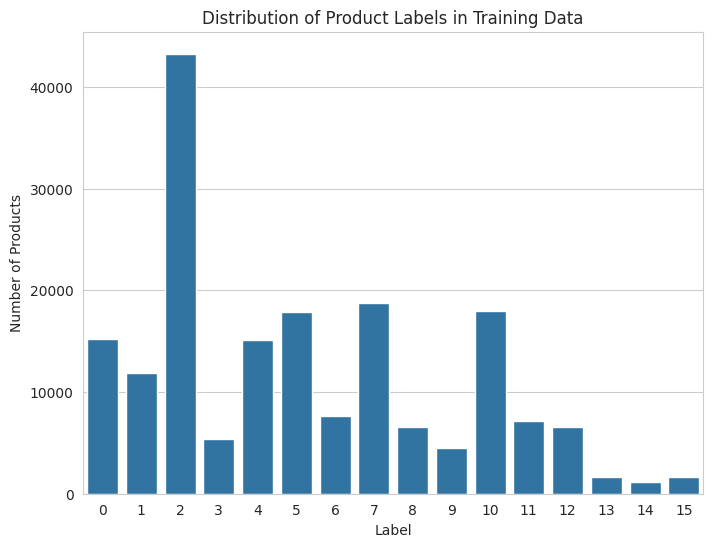


Training Labels Percentage Distribution:
label
2     23.768447
7     10.307353
10     9.857917
5      9.791985
0      8.332143
4      8.284892
1      6.516818
6      4.172939
11     3.914157
12     3.621859
8      3.615815
3      2.948254
9      2.480687
13     0.888432
15     0.877993
14     0.620309
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=training_labels_df)
plt.title('Distribution of Product Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Number of Products')
plt.show()

# Calculate percentage for each label
label_percentages = training_labels_df['label'].value_counts(normalize=True) * 100
print("\nTraining Labels Percentage Distribution:")
print(label_percentages)

This plot is a "Distribution of Product Labels in Training Data," which is a bar chart showing the count of products for each discrete label (category) in a training dataset.

Here's a commentary on the key aspects of the plot:

**1. Type of Plot:**
* This is a **bar chart**, ideal for visualizing the frequency or count of categorical data (in this case, discrete product labels).

**2. Overall Distribution:**
* The distribution of product labels is **highly imbalanced**. This means that some labels have a significantly higher number of products than others.

**3. Dominant Labels:**
* **Label '2' is by far the most dominant label**, with over 40,000 products. This label represents a very large proportion of the training data.
* Other relatively common labels include '5', '7', and '10', each having between approximately 17,000 and 19,000 products.

**4. Underrepresented Labels:**
* Several labels have a much smaller number of products:
    * Labels '3', '8', '9', '13', '14', and '15' have comparatively few products, ranging from around 1,000 to 6,000.
    * Labels '13', '14', and '15' are particularly underrepresented, with less than 2,000 products each.

**5. Implications for Machine Learning (Training Data):**
* **Class Imbalance:** The most critical observation here is the **severe class imbalance**. This is a common issue in classification tasks and can significantly impact the performance of machine learning models.

**In summary, this plot clearly illustrates a highly imbalanced distribution of product labels in the training data, with Label '2' being overwhelmingly dominant. This imbalance is a crucial factor to consider when developing and evaluating machine learning models for product classification.**

In [ ]:
# --- 4. Combined Training Dataset Analysis ---
print("\n--- Combined Training Dataset Analysis ---")

# Load the combined training dataset

try:
    training_dataset = pd.read_excel(drive_path + "training_dataset.xlsx")
except FileNotFoundError:
    print("Error: 'training_dataset.xlsx' not found. Please ensure preprocessing is run.")

print("\nTraining Dataset Info:")
training_dataset.info()

print("\nTraining Dataset Head:")
print(training_dataset.head())


--- Combined Training Dataset Analysis ---

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182006 entries, 0 to 182005
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   product_id   182006 non-null  int64 
 1   description  182006 non-null  object
 2   label        182006 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.2+ MB

Training Dataset Head:
   product_id                                        description  label
0           0  FSA Orbit 1.5ZS Zero Stack Internal Bicycle He...      5
1           1  Columbia Bugaboo II 12-Foot-by-9-Foot 4-Pole 5...     10
2           2     Men's New Gym Workout Short Gary Majdell Sport      0
3           3  Vktech Cute Creative Girls Tibet Silver Petal ...      7
4           4  Real Avid ZipWire Pistol Cleaning Kit Real Avi...      2


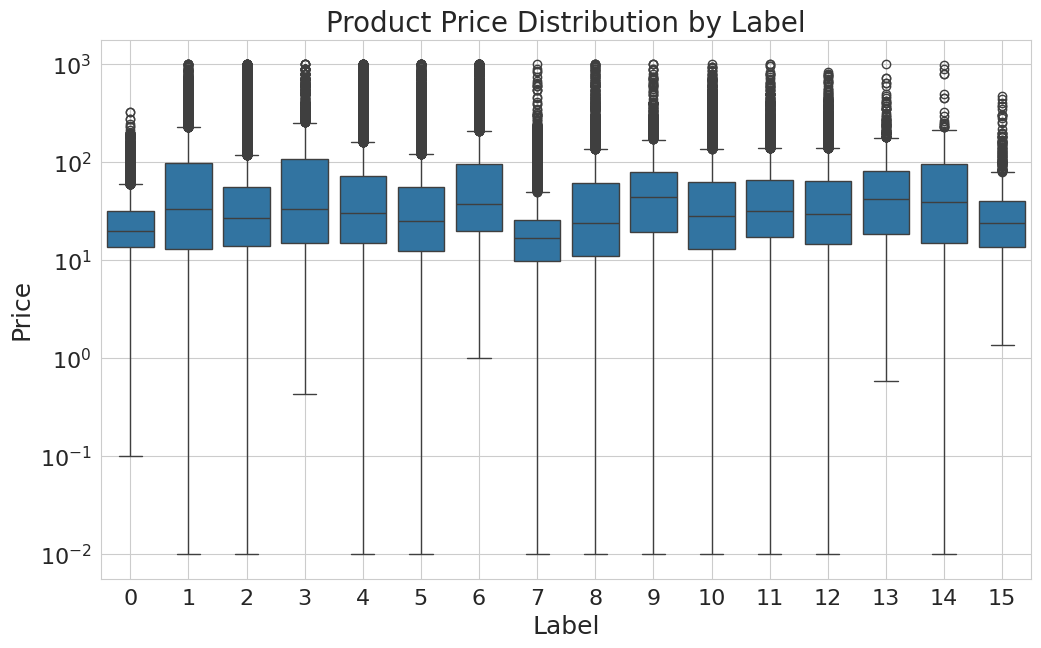

In [ ]:
# Merge prices and description lengths/word counts into the training_dataset
# This ensures we have all relevant features for combined analysis.
training_dataset_with_features = training_dataset.merge(product_prices_df[['product_id', 'price']], on='product_id', how='left')
training_dataset_with_features = training_dataset_with_features.merge(
    product_descriptions_df[['product_id', 'description_length', 'word_count']], on='product_id', how='left'
)

plt.figure(figsize=(12, 7))
sns.boxplot(x='label', y='price', data=training_dataset_with_features)

# You can also specify fontsize for individual elements if needed
plt.title('Product Price Distribution by Label', fontsize=20)
plt.xlabel('Label', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.yscale('log') # Use log scale for price if there's a wide range
plt.tick_params(axis='x', labelsize=16) # Adjust labelsize as needed for X-axis ticks
plt.tick_params(axis='y', labelsize=16) # Adjust labelsize as needed for Y-axis ticks

plt.grid(True)
plt.show()

This plot is a "Product Price Distribution by Label," a series of box plots displaying the distribution of product prices for each distinct product label (category). The y-axis (Price) is on a **logarithmic scale**.

Here's a commentary on the key aspects of the plot:

**1. Plot Type and Scale:**
* **Box Plots:** Each box plot summarizes the distribution of prices for a specific label, showing the median, interquartile range (IQR), and potential outliers.
* **Logarithmic Y-axis:** The use of a logarithmic scale for price is crucial because it allows us to visualize the wide range of prices (from very low, like 0.01, to very high, like 1000) and to better distinguish differences among the lower prices, which would be compressed on a linear scale. This is consistent with the earlier observations of right-skewed price distributions.

**2. Overall Observations Across Labels:**
* **Consistent Upper Outliers:** For almost all labels, there's a significant presence of high-priced outliers (represented by individual circles above the whiskers). These outliers extend up to $1000 (the maximum value shown on the y-axis), indicating that expensive products exist across many categories.

* **Price Range Variability:** While all labels have a wide price range (especially on a linear scale), the *ypical price range (represented by the boxes and whiskers) varies.
* **Median Price Variability:** The median price (the horizontal line inside each box) appears to vary across labels, but generally falls within the range of $10 to $100.

**3. Specific Label Observations:**

* **Labels 0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12:** These labels show a median price somewhere between roughly $15 and $30. Their interquartile ranges (the boxes) are relatively tight, indicating that the majority of products in these categories fall within a relatively narrow, lower price band. They all exhibit numerous high-price outliers.
* **Label 3:** This label stands out with a significantly lower median price and a very compressed box (IQR) at the lower end, suggesting that most products in this category are extremely inexpensive. It also has an outlier near $0.5, which is unusually low compared to other labels. It still has high-price outliers extending to 1000.

* **Label 8:** This label appears to have a slightly higher median price than many others, with its box positioned slightly higher on the log scale, suggesting slightly more expensive products on average.
* **Labels 13, 14, 15:** These labels appear to have median prices similar to many others, but their boxes and whiskers might indicate slightly different spreads or concentrations. Label 15, in particular, shows a very wide spread of prices within its IQR and whiskers, and even some points below $1 (though still higher than Label 3's lowest outlier).

**4. Insights and Implications:**
* **Categorical Price Differences:** Despite the overall right-skewness of product prices, this plot highlights that there are indeed differences in the price distributions *between* different product categories (labels). Some categories tend to have generally lower median prices, while others might have slightly higher ones.
* **Presence of Premium/Luxury Items:** The persistent presence of high-priced outliers across almost all labels suggests that even within categories with generally inexpensive items, there are often premium or specialty products that command much higher prices.
* **Data Imbalance Context:** When combined with the previous plot showing class imbalance (Label 2 being dominant), this plot tells us that the dominant category (Label 2) also contains a wide range of prices, with a concentration at the lower end but a long tail of expensive items.


**In summary, this series of box plots on a logarithmic scale effectively illustrates the varied price distributions across different product labels, revealing that while most products are generally inexpensive, there are consistent high-priced outliers across almost all categories, and some categories inherently tend to have slightly lower or higher typical prices than others.**

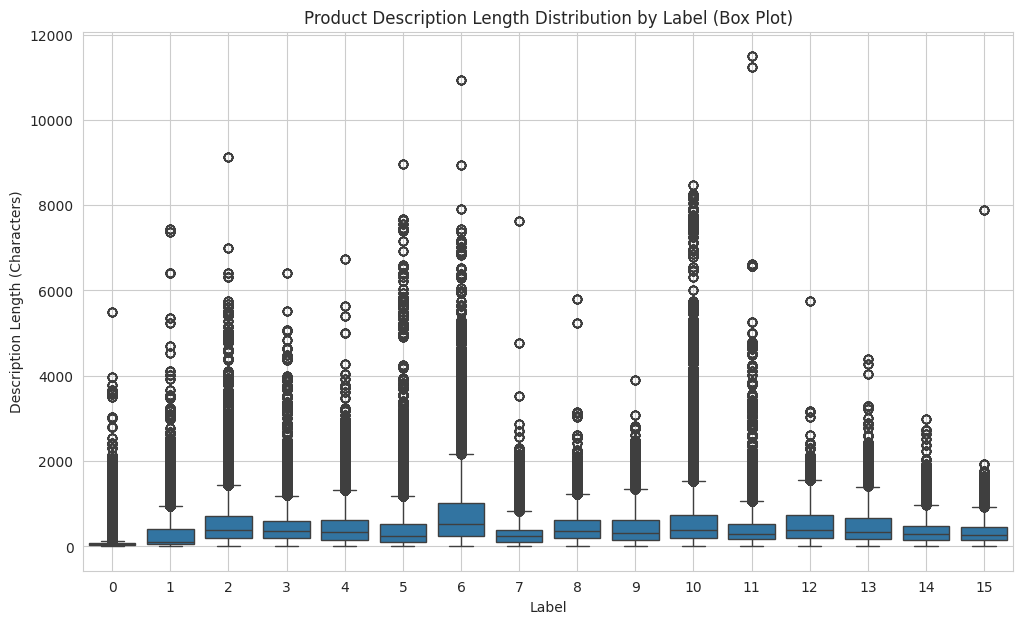

In [ ]:
training_dataset_with_features = pd.concat([training_dataset_with_features], ignore_index=True) # Make it a bit larger for better visualization

plt.figure(figsize=(12, 7))
sns.boxplot(x='label', y='description_length', data=training_dataset_with_features)
plt.title('Product Description Length Distribution by Label (Box Plot)')
plt.xlabel('Label')
plt.ylabel('Description Length (Characters)')
plt.grid(True)
plt.show()

This plot is a "Product Description Length Distribution by Label (Box Plot)," which displays the distribution of product description lengths (in characters) for each product label (category) using box plots.

Here's a commentary on the key aspects of the plot:

**1. Plot Type and Scale:**
* **Box Plots:** Each box plot summarizes the distribution of description lengths for a specific label, showing the median, interquartile range (IQR), and potential outliers.
* **Linear Y-axis:** The y-axis (Description Length) is on a linear scale, ranging from 0 to 12,000 characters.

**2. Overall Observations Across Labels:**
* **Consistent Right Skewness:** For all labels, the box plots confirm the strong right-skewness observed in the overall distribution of description lengths. The boxes are heavily compressed at the lower end, and there's a significant presence of high-length outliers extending upwards.
* **Many Outliers:** There are numerous individual points (circles) above the whiskers for almost every label, indicating many product descriptions are much longer than the typical length within their respective categories. These outliers extend up to 8,000-11,000 characters.
* **Low Median Lengths:** The median description length (the horizontal line inside each box) for most labels is very low, generally within the range of 100-300 characters. This reinforces the idea that most product descriptions are concise.

**3. Specific Label Observations:**

* **Labels with Wider Distributions (e.g., 0, 1, 2, 4, 5, 6, 7, 10, 11, 12):**
    * These labels generally show slightly taller boxes and whiskers, indicating a somewhat wider range of "typical" description lengths.
    * They also exhibit a large number of high-value outliers, with description lengths reaching up to 8,000, 9,000, or even 11,000 characters (e.g., Label 6). This suggests that within these categories, while many products have short descriptions, a considerable number also have very detailed ones.
* **Labels with Tighter Distributions (e.g., 3, 8, 9, 13, 14, 15):**
    * These labels tend to have very compressed boxes and shorter whiskers, indicating that the majority of their product descriptions are extremely short (perhaps within 0-200 characters).
    * While they still have outliers, these outliers might not extend as far as those in other categories (e.g., Label 14 has fewer and less extreme outliers compared to Label 6). Label 3, in particular, shows a very tight distribution at the very low end.

**4. Insights and Implications:**
* **Varying Detail Levels by Category:** The plot reveals that the typical (median) description length and the spread of description lengths vary significantly across different product categories. Some categories inherently require or tend to have much longer descriptions (e.g., perhaps for complex technical products), while others consistently use very brief ones (e.g., simple commodities).
* **Importance of Outliers:** The presence of extreme outliers across almost all categories highlights that even in categories where most descriptions are short, there are exceptions that require extensive detail. This could be due to specific product features, legal requirements, or marketing strategies.

**In summary, this box plot analysis demonstrates that while product descriptions are generally short across all categories, there are clear differences in the typical lengths and the prevalence of very long descriptions between different product labels, with some categories consistently featuring more detailed product information.**

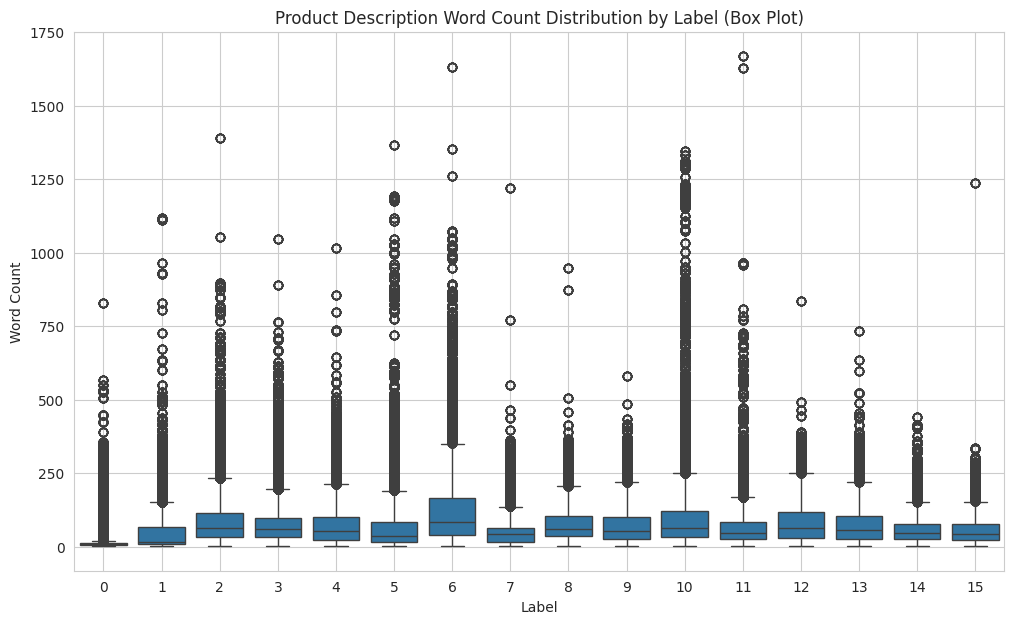

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='label', y='word_count', data=training_dataset_with_features) # Changed to boxplot
plt.title('Product Description Word Count Distribution by Label (Box Plot)')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

This plot, titled "Product Description Word Count Distribution by Label (Box Plot)," is a series of box plots showing the distribution of product description word counts for each distinct product label (category).

Here's a commentary on the key aspects of the plot:

**1. Plot Type and Scale:**
* **Box Plots:** Each box plot summarizes the distribution of word counts for a specific label, displaying the median, interquartile range (IQR), and potential outliers.
* **Linear Y-axis:** The y-axis (Word Count) is on a linear scale, ranging from 0 to approximately 1750 words.

**2. Overall Observations Across Labels:**
* **Consistent Right Skewness:** Similar to the description length in characters, the word count distribution for all labels is heavily right-skewed. The boxes are compressed at the lower end, and there's a strong presence of high-word-count outliers.
* **Numerous Outliers:** A significant number of individual points (circles) are visible above the whiskers for almost every label, indicating that many product descriptions have word counts much higher than the typical range within their categories. These outliers extend up to 1500 words or more.
* **Low Median Word Counts:** The median word count (the horizontal line inside each box) for most labels is very low, generally within the range of 20-50 words. This further emphasizes the brevity of most product descriptions.

**3. Specific Label Observations:**

* **Labels with Wider Distributions and More Extreme Outliers (e.g., 0, 1, 2, 4, 5, 6, 7, 10, 11, 12):**
    * These labels generally show slightly taller boxes and longer whiskers, suggesting a wider range of "typical" description word counts.
    * They also exhibit a large number of high-value outliers, with word counts reaching up to 1000, 1250, or even 1500+ words (e.g., Labels 5, 6, 10, 11). This implies that within these categories, while many products have short descriptions, a considerable number also have very detailed ones.
* **Labels with Tighter Distributions and Fewer/Less Extreme Outliers (e.g., 3, 8, 9, 13, 14, 15):**
    * These labels tend to have very compressed boxes and shorter whiskers, indicating that the majority of their product descriptions are extremely short (perhaps within 0-50 words).
    * While they still have outliers, these outliers might not extend as far or be as numerous as those in other categories (e.g., Label 14 and 15 have fewer and less extreme outliers compared to Label 5 or 10).

**4. Consistency with Description Length (Characters) Plot:**
* This plot shows very similar patterns to the "Product Description Length Distribution by Label (Box Plot)." This consistency is expected, as word count and character count are highly correlated measures of text length. Both plots reinforce the observation that descriptions are generally concise but some products demand much more detail.


**In summary, this box plot analysis effectively illustrates that while product descriptions are generally very concise in terms of word count across all categories, there are notable differences in the typical word counts and the presence of highly detailed descriptions between different product labels.**

In [ ]:
# --- 5. Test Dataset Analysis ---
print("\n--- Test Dataset Analysis ---")


try:
    test_dataset = pd.read_excel(drive_path + "test_dataset.xlsx")
except FileNotFoundError:
    print("Error: 'test_dataset.xlsx' not found. Please ensure preprocessing is run.")

print("\nTest Dataset Info:")
test_dataset.info()

print("\nTest Dataset Head:")
print(test_dataset.head())


--- Test Dataset Analysis ---

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   45502 non-null  int64 
 1   description  45502 non-null  object
dtypes: int64(1), object(1)
memory usage: 711.1+ KB

Test Dataset Head:
   product_id                                        description
0           7  Ontario Knives 8849OD Ontario Knives - Part Se...
1           8  Franklin Sports Recreational Volleyball Set Th...
2          15  2012 Flite Kite Dedicated light wind design! F...
3          17  Under Armour Elevate 22 Ounce Tritan Bottle wi...
4          18  Spalding 88354PR NBA 48" Polycarbonate Backboa...


In [ ]:
# Check if there's any overlap between train and test product IDs
# Assuming 'training_dataset' is loaded from 'training_dataset.xlsx' as well

try:
    training_dataset = pd.read_excel(drive_path + "training_dataset.xlsx")
    test_dataset = pd.read_excel(drive_path + "test_dataset.xlsx")
except FileNotFoundError:
    print("Error: Training or Test dataset not found. Please ensure preprocessing is run.")

common_product_ids = pd.merge(training_dataset, test_dataset, on='product_id', how='inner')
print(f"\nNumber of common product IDs between training and test sets: {len(common_product_ids)}")


Number of common product IDs between training and test sets: 0


In [ ]:
# --- 6. Products Graph Analysis ---
print("\n--- Products Graph Analysis ---")

# Load the edges from the undirected graph file

edges = []
try:
    with open(drive_path + "undirected_products_graph.txt", "r") as f:
        for line in f:
            # Assuming format is like [node1, node2]\n
            nodes_str = line.strip().replace('[', '').replace(']', '').split(',')
            edges.append([int(nodes_str[0]), int(nodes_str[1])])
except FileNotFoundError:
    print("Error: 'undirected_products_graph.txt' not found. Please ensure preprocessing is run.")

print(f"\nNumber of edges in the undirected graph: {len(edges)}")


--- Products Graph Analysis ---

Number of edges in the undirected graph: 3622174


In [ ]:
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add edges to the graph
if edges: # Ensure edges list is not empty
    G.add_edges_from(edges)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 276453
Number of edges in the graph: 1811087


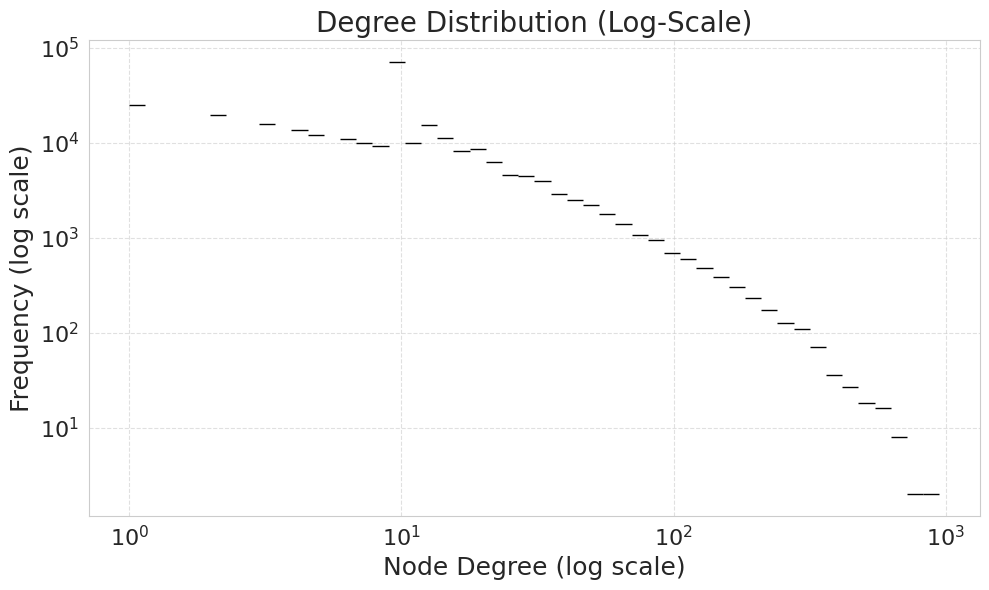

In [ ]:
# Plot Degree Distribution with Log-Scale
if G.number_of_nodes() > 0:
    degree_sequence = sorted([degree for _, degree in G.degree()], reverse=True)

    plt.figure(figsize=(10, 6))
    sns.histplot(degree_sequence, bins=50, kde=False, color='steelblue', edgecolor='black', log_scale=(True, True))

    plt.title('Degree Distribution (Log-Scale)', fontsize=20)
    plt.xlabel('Node Degree (log scale)', fontsize=18)
    plt.ylabel('Frequency (log scale)', fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='x', labelsize=16) # Adjust labelsize as needed for X-axis ticks
    plt.tick_params(axis='y', labelsize=16) # Adjust labelsize as needed for Y-axis ticks
    plt.tight_layout()
    plt.show()
else:
    print("The graph is empty. Degree distribution cannot be computed.")


This plot, titled "Degree Distribution (Log-Scale)," displays the distribution of node degrees in a network, with both the x-axis (Node Degree) and y-axis (Frequency) using a logarithmic scale. This type of plot is commonly used to analyze the structure of complex networks.

Here's a commentary on the key aspects of the plot:

**1. Plot Type and Scale:**
* **Log-Log Plot:** Both axes are on a logarithmic scale. This is a common way to visualize degree distributions, especially for networks that exhibit scale-free or power-law characteristics.
* **Interpretation of Log-Log:** On a log-log plot, a linear relationship (a straight line with a negative slope) suggests a power-law distribution, where the frequency of a degree $k$ is proportional to $k^{-\alpha}$ (for some exponent $\alpha$).

**2. Overall Shape and Trend:**
* **Decreasing Trend:** The plot shows a clear decreasing trend: as the node degree increases, the frequency of nodes with that degree decreases. This is expected in most real-world networks; there are many nodes with few connections and fewer nodes with many connections.
* **Approximately Linear on Log-Log:** For a significant portion of the distribution (roughly from a degree of 10 up to 1000), the points appear to follow a roughly linear downward trend on the log-log scale. This suggests that the network's degree distribution might approximate a power-law distribution, at least in its tail.
* **Deviation at Low Degrees:** At very low degrees (e.g., degree 1 to 5), the distribution seems to deviate slightly from a perfect linear trend, showing a relatively high frequency of nodes with low degrees. This is also common, as many nodes might be only sparsely connected.
* **Deviation at High Degrees:** For the highest degrees (approaching 1000), the line segment becomes very sparse and the frequency drops sharply, indicating the presence of a few "hub" nodes with very high degrees, but these are extremely rare.

**3. Key Points on the Plot:**
* **High Frequency at Low Degrees:** There's a very high frequency (tens of thousands of nodes) for nodes with degrees of 1, 2, 3, etc. This means most nodes in the network are not highly connected.
* **"Hubs" at High Degrees:** While rare, there are nodes with degrees approaching 1000. These are often referred to as "hubs" in complex networks, as they are highly connected and can be critical to the network's structure and function.

**4. Implications:**
* **Network Structure:** This type of distribution implies a heterogeneous structure where connectivity is not uniform.


**In summary, this log-log plot of the degree distribution strongly suggests that the underlying network exhibits characteristics of a scale-free or power-law network. It shows that while most nodes have very few connections, a small number of "hub" nodes are highly connected, a common feature in many real-world complex systems.**

In [ ]:
# Number of connected components
if G.number_of_nodes() > 0:
    print(f"Number of connected components: {nx.number_connected_components(G)}")
    largest_cc = max(nx.connected_components(G), key=len)
    print(f"Size of the largest connected component: {len(largest_cc)} nodes")
else:
    print("Graph is empty, cannot compute connected components.")

print("\n--- EDA Complete ---")

Number of connected components: 1177
Size of the largest connected component: 273012 nodes

--- EDA Complete ---
